In [1]:
# Creating a model
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Custom activation function
from keras.layers import Activation
from keras import backend as k
from keras.utils.generic_utils import get_custom_objects
"""
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
"""

#r = tf.cond(tf.less(x, y), f1, f2)


@tf.function
def custom_activation(x):
  #def f1(): return k.tf.add(0.001,k.tf.add(x,7.5))
  def f3(): return k.tf.add(0.062,k.tf.multiply(tf.cast(x, tf.float32),0.011))
  def f5(): return k.tf.add(0.253,k.tf.multiply(tf.cast(x, tf.float32),0.072))
  def f7(): return k.tf.add(0.5,k.tf.multiply(tf.cast(x, tf.float32),0.231))
  def f9(): return k.tf.add(0.866,k.tf.multiply(tf.cast(x, tf.float32),0.029))
  def f11(): return k.tf.add(0.973,k.tf.multiply(tf.cast(x, tf.float32),0.004))
  def f12(): return k.tf.ones([1,1],tf.float32)

  def f10(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), 4), tf.less(tf.cast(x, tf.float32), 6)),x=f11(),y=f12())
  def f8(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), 2), tf.less(tf.cast(x, tf.float32), 4)),x=f9(),y=f10())
  def f6(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -2), tf.less(tf.cast(x, tf.float32), 2)),x=f7(),y=f8())
  def f4(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -4), tf.less(tf.cast(x, tf.float32), -2)),x=f5(),y=f6())
  def f2(): return k.tf.where(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -6), tf.less(tf.cast(x, tf.float32), -4)),x=f3(),y=f4())
  
  
  r = tf.where(
         condition=(k.tf.logical_and(k.tf.greater(tf.cast(x, tf.float32), -10), tf.less(tf.cast(x, tf.float32), -6))),
         x=k.tf.add(0.001,k.tf.multiply(tf.cast(x, tf.float32),0.008)),
         y=f2()
     )

  return r

# 0
# 0.002 + 0.001(x+6.25) -> 0.00825+0.001x
# 0.023 + 0.007(x+3.75) -> 0.4925+0.007x
# 0.245 + 0.076(x+1.125) -> 0.3305+0.076x
# 0.755 + 0.207(x-1.125) -> 0.5222-0.207x
# 0.977 + 0.099(x-3.75) -> 0.6058-0.099x
# 0.998 + 0.012(x-6.25) -> 0.923-0.012x
# 1.0 + 0.001(x-8.75) -> 0.99125-0.001x

# k.tf.zeros([1,1], tf.float32)
"""
  r = K.tf.where(
         condition=(K.tf.logical_and(K.tf.greater(x, -10), K.tf.less(x, -5))),
         x=K.tf.add(0.001,K.tf.add(x,7.5)),
         y=f2()
     )
"""
#tf.logical_or((tf.logical_and(tf.greater(x, -10), tf.less(x, -5))), (tf.logical_and(tf.greater(x, -5), tf.less(x, 5)) )


    #def f1(): return tf.add(0.5,tf.multi(0.099,x))

    # return tf.where(
    #     condition=tf.logical_or((tf.logical_and(tf.greater(x, -10), tf.less(x, -5))), (tf.logical_and(tf.greater(x, -5), tf.less(x, 5)) )),
    #     x=tf.add(0.001,tf.add(x,7.5)),
    #     y=tf.add(0.5,tf.multiply(0.099,x))
    # )

"""
  x =tf.dtypes.cast(x, tf.int32)
  if (x > -10 & x < -5):
    y = 0.001 + 0.015*(x+7.5);
  if (x > -5 & x < 5):
    y = 0.5 + 0.099*x;
  if x > 5:
    y = 0.999;
  return y
"""
"""
loss = tf.where(
        condition=tf.logical_or((tf.logical_and(tf.greater(y_true, 0.0), tf.greater(y_pred, y_true))), (tf.logical_and(tf.less(y_true, 0.0), tf.less(y_pred, y_true)))),
        x=loss * penalty / 5,
        y=loss * penalty / 10
    )
"""
"""
# working
# tf.where(tf.less(x, 0), tf.add(0.5,tf.multiply(0.099,x)) ,tf.add(0.5,tf.multiply(0.099,x)))
"""
# tf.where(tf.less(x, 0), true_fn=lambda: tf.add(0.5,tf.multiply(0.099,x)), false_fn=lambda: tf.add(0.5,tf.multiply(0.099,x))) 
# tf.cond(tf.logical_and(tf.less(x,-10),tf.greater(x,-5))): 
"""
    if x > -5 and x < 5:
        return tf.add(0.5,tf.multi(0.099,x)) 
    if x > 5:
        return 0.999
"""
get_custom_objects().update({'custom_activation': Activation(custom_activation)})
"""
# Usage
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())
"""

"\n# Usage\nmodel = Sequential()\nmodel.add(Dense(32, input_dim=784))\nmodel.add(Activation(custom_activation, name='SpecialActivation'))\nprint(model.summary())\n"

In [2]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow
tensorflow.random.set_seed(22)

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

# use functional API to build cnn layers
inputs = Input(shape=input_shape)

y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='custom_activation')(inputs)

y = MaxPooling2D()(y)

y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='custom_activation')(y)

y = MaxPooling2D()(y)
# y = Conv2D(filters=filters,
#            kernel_size=kernel_size,
#            activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
#y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)



# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)
# network model in text
model.summary()
# Retrieve the config

# classifier loss, Adam optimizer, classifier accuracy
from tensorflow.keras.optimizers import Adam
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# train the model with input images and labels
history = model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=50,
          batch_size=batch_size)

# model accuracy on test dataset
score = model.evaluate(x_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

11501568/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                              

(0.0, 2.0)

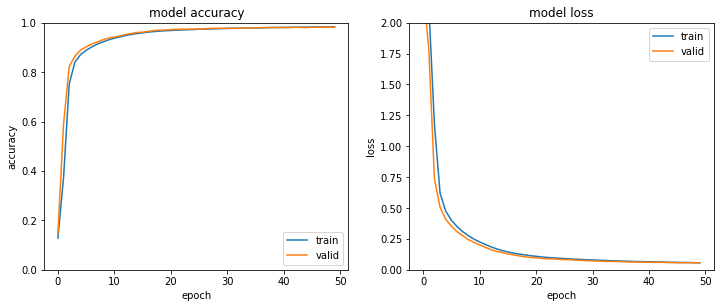

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])